# Data acquisition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def data_acquisition(dataset):
    df = pd.read_csv('../dataset/' + dataset + '.csv')
    df = df.dropna()
    
    return df

In [2]:
def plot_graph(x, graph_type=None, W_grid=2 ,L_grid=2):
    fig, axes = plt.subplots(L_grid, W_grid, figsize =(10,10))
    axes = axes.ravel()
    
    if graph_type == 'boxplot':
        for i in np.arange(0, W_grid * L_grid):
            axes[i].boxplot(x.iloc[:,i], showfliers = True)
        plt.subplots_adjust(hspace=0.4)
    
    if graph_type == 'scatter':
        axes[0].scatter(x.iloc[:,1], x.iloc[:,2])
        axes[1].scatter(x.iloc[:,1], x.iloc[:,3])
        axes[2].scatter(x.iloc[:,2], x.iloc[:,3])
        plt.subplots_adjust(hspace=0.4)

# Techniques

In [3]:
df = data_acquisition('credit_data')

#### Boxplot

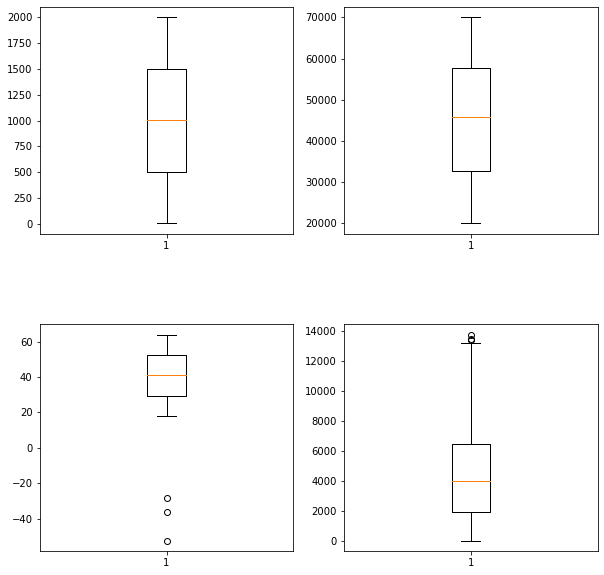

In [4]:
plot_graph(df, graph_type='boxplot')

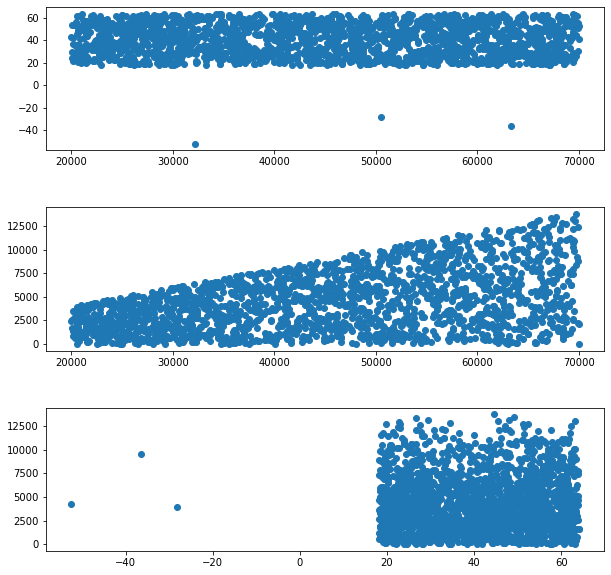

In [5]:
plot_graph(df, graph_type='scatter', W_grid=1 ,L_grid=3)

In [ ]:
from pyod.models.knn import KNN

df = data_acquisition('census')
detector = KNN()
detector.fit(df.iloc[:, 1:4])

predictions = detector.labels_

outliers = []
for i in range(len(predictions)):
    if predictions[i] == 1:
        outliers.append(i)
        
outliers_list = df.iloc[outliers, :]
outliers_list